<a href="https://colab.research.google.com/github/alexdel1/graph_csv_to_svg/blob/main/csv_to_svg_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Parse the CSV data
csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr.,3.2.3,dashed
éq. unit.,éq. irr.,éq. 3.2.3,dashed
unit.,déc.,3.2.3,dashed
éq. unit.,éq. déc.,éq. 3.2.3,dashed
fini,éq. unit.,3.2.4
fini,irr.,3.2.5,dashed
fini,déc.,3.2.5,dashed
fini,irr. ou déc.,3.2.5
irr. ou déc.,irr.
irr. ou déc.,déc.
irr.,indéc.,3.2.7 pas la réciproque
#fini,comp. réd.,3.2.8 Maschke
fini,comp. réd.,3.2.8 Mascuyuddrgv
"""
csv_node=r"""name,texlbl,shape
#fini,$\mathrm{card}(G)<\infty$
fini,$\mathrm{card}(A)<\infty$
#irr. ou déc.,$\mathrm{ou}$,diamond
"""

!sudo apt update
!sudo apt install graphviz libgraphviz-dev
#ne pas oublier la version dev de graphviz

!pip install pygraphviz

In [2]:


%%capture
!pip install git+https://github.com/alexdel1/graph_csv_to_svg.git
!sudo apt update
!sudo apt install graphviz libgraphviz-dev
!pip install pygraphviz
!pip install dot2tex
!sudo apt install pdf2svg
!sudo apt update
!sudo apt install texlive-xetex

In [3]:
import pandas as pd
import io
import unicodedata
import re
import networkx as nx
import pygraphviz # Import the Graph class
from networkx.drawing.nx_pydot import to_pydot
from IPython.display import SVG
import subprocess

In [9]:

# Function to convert text to a valid Python variable name
def to_variable_name(text):
    # Normalize the text to decompose accented characters
    text = unicodedata.normalize('NFKD', str(text))

    # Remove non-ASCII characters and replace with their base letters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove remaining special characters and replace spaces with underscores
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace(' ', '_')

    return text


'''
(B,C)=csv_to_pd(csv_data,csv_node)

print("\nDataFrame B:")
print(B)
print("\nDataFrame C:")
print(C)
'''

'\n(B,C)=csv_to_pd(csv_data,csv_node)\n\nprint("\nDataFrame B:")\nprint(B)\nprint("\nDataFrame C:")\nprint(C)\n'

In [13]:

def pd_to_nx(B,C):
    # Assuming B and C DataFrames are already created from the previous code

    # Create an empty graph
    G = nx.DiGraph()  # Using DiGraph for a directed graph

    # Add nodes from table B
    # Use the 'name' column as node identifier and 'texlbl' as a node attribute
    for _, row in B.iterrows():
        G.add_node(
            row['name'],  # Use the converted variable name as node identifier
            texlbl=row['texlbl'],  # Original label as a node attribute
            shape=row['shape']
        )

    # Add edges from table C
    for _, row in C.iterrows():
        # Add an edge using the converted source and target names
        G.add_edge(
            row['source_name'],  # Source node
            row['target_name'],  # Target node
            style=row.get('style', ''),  # Style attribute
            texlbl=row.get('label', '')  # Label attribute
        )
    return G
'''
G = pd_to_nx(B,C)
# Optional: Verify the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Optional: Print node and edge details
print("\nNodes:")
for node in G.nodes(data=True):
    print(node)

print("\nEdges:")
for edge in G.edges(data=True):
    print(edge)
'''

'\nG = pd_to_nx(B,C)\n# Optional: Verify the graph\nprint("Number of nodes:", G.number_of_nodes())\nprint("Number of edges:", G.number_of_edges())\n\n# Optional: Print node and edge details\nprint("\nNodes:")\nfor node in G.nodes(data=True):\n    print(node)\n\nprint("\nEdges:")\nfor edge in G.edges(data=True):\n    print(edge)\n'

In [12]:
# Convertir le graphe en pygraphviz AGraph
#A = to_agraph(G)

# Personnaliser le style
#A.graph_attr.update(rankdir="LR")  # Orientation de gauche à droite
#A.node_attr.update(fontsize="10", style="filled")
#A.edge_attr.update(color="black", arrowsize="0.5")
#A.graph_attr.update(encoding="utf-8")

# Écrire directement dans un fichier DOT
#A.write("graph.dot")

def nx_to_dot(G,tex_file_path="graph"):
    dot_graph = to_pydot(G)

    # Save the DOT file
    with open(tex_file_path+".dot", "w", encoding="utf-8") as f:
        f.write(dot_graph.to_string())
    return(dot_graph)
'''
dot_graph=nx_to_dot(G)
print(dot_graph.to_string())
'''


# Écrire directement dans un fichier DOT
#A.write("graph.dot")


'''
# Method 3: Using read().splitlines()
with open('graph.dot', 'r') as file:
    lines = file.read().splitlines()
    for line in lines:
        print(line)
# Method 3: Using read().splitlines()
with open('graph.dot', 'r') as file:
    lines = file.read().splitlines()
    for line in lines:
        print(line)
'''

"\n# Method 3: Using read().splitlines()\nwith open('graph.dot', 'r') as file:\n    lines = file.read().splitlines()\n    for line in lines:\n        print(line)\n# Method 3: Using read().splitlines()\nwith open('graph.dot', 'r') as file:\n    lines = file.read().splitlines()\n    for line in lines:\n        print(line)\n"

!pip install dot2tex

!sudo apt install pdf2svg

!sudo apt update
!sudo apt install texlive-xetex


!dot2tex  --docpreamble "\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage{amssymb}" -tmath --autosize graph.dot > graph.tex
#!latex

# Parse the CSV data
csv_data = r"""source,target,label,style
twts,$t^2$,$w_4$
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr.,3.2.3,dashed
éq. unit.,éq. irr.,éq. 3.2.3,dashed
unit.,déc.,3.2.3,dashed
éq. unit.,éq. déc.,éq. 3.2.3,dashed
fini,éq. unit.,3.2.4
fini,irr.,3.2.5,dashed
fini,déc.,3.2.5,dashed
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Maschke
$\phi \nsim \rho$,$\frac{\gamma}{x^2}$,test
"""

In [ ]:
#
#!dot2tex  --docpreamble "\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage{amssymb}" -tmath --autosize testnode.dot > testnode.tex
#!latex

In [ ]:
#!xelatex testnode.tex
#!pdf2svg testnode.pdf testnode.svg

#SVG("testnode.svg")

csv_node=r"""name,texlbl
fini,$\text{card}(G)<\infty$
"""

In [ ]:
'''
def text_to_dot(dot_text: str, file_name: str):
    """
    Save the given DOT text to a file.

    :param dot_text: The text content in DOT format.
    :param file_name: The name of the file to save the content (e.g., "graph.dot").
    """
    try:
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(dot_text)
        print(f"DOT file saved successfully as '{file_name}'")
    except Exception as e:
        print(f"An error occurred while saving the file: {e}")

# Example usage:
dot_text = """
digraph G {
    rankdir=LR;
    node [shape=rectangle];

    // Rectangle central
    rect [label="Rectangle central", shape=rect];

    // Entrées
    in1 [label="Entrée 1", shape=circle];
    in2 [label="Entrée 2", shape=circle];
    in3 [label="Entrée 3", shape=circle];

    // Sorties
    out1 [label="Sortie 1", shape=circle];
    out2 [label="Sortie 2", shape=circle];
    out3 [label="Sortie 3", shape=circle];

    // Connexions vers le rectangle
    in1 -> rect;
    in2 -> rect;
    in3 -> rect;

    // Connexions depuis le rectangle
    rect -> out1;
    rect -> out2;
    rect -> out3;
}
"""
text_to_dot(dot_text, "graphorand.dot")
'''

'\ndef text_to_dot(dot_text: str, file_name: str):\n    """\n    Save the given DOT text to a file.\n\n    :param dot_text: The text content in DOT format.\n    :param file_name: The name of the file to save the content (e.g., "graph.dot").\n    """\n    try:\n        with open(file_name, \'w\', encoding=\'utf-8\') as file:\n            file.write(dot_text)\n        print(f"DOT file saved successfully as \'{file_name}\'")\n    except Exception as e:\n        print(f"An error occurred while saving the file: {e}")\n\n# Example usage:\ndot_text = """\ndigraph G {\n    rankdir=LR;\n    node [shape=rectangle];\n\n    // Rectangle central\n    rect [label="Rectangle central", shape=rect];\n\n    // Entrées\n    in1 [label="Entrée 1", shape=circle];\n    in2 [label="Entrée 2", shape=circle];\n    in3 [label="Entrée 3", shape=circle];\n\n    // Sorties\n    out1 [label="Sortie 1", shape=circle];\n    out2 [label="Sortie 2", shape=circle];\n    out3 [label="Sortie 3", shape=circle];\n\n    // C

In [ ]:
def dot_to_svg(tex_file_path):
    # Using subprocess for shell commands
    subprocess.run(f'dot2tex --docpreamble "\\usepackage[utf8]{{inputenc}} \\usepackage[T1]{{fontenc}} \\usepackage{{amssymb}}" -tmath --autosize "{tex_file_path}.dot" > "{tex_file_path}.tex"', shell=True)
    insert_resizebox(f"{tex_file_path}.tex")
    subprocess.run(f'xelatex "{tex_file_path}.tex"', shell=True)

    subprocess.run(f'pdf2svg "{tex_file_path}.pdf" "{tex_file_path}.svg"', shell=True)

    SVG(f"{tex_file_path}.svg")

#dot_to_svg("graphorand")

In [ ]:
# Parse the CSV data
csv_data = r"""source,target,label,style
éq. déc.,déc.,3.1.23
éq. irr.,irr.,3.1.24
éq. comp. réd.,comp. réd.,3.1.25
unit.,irr. ou déc.2,3.2.3
éq. unit.,éq. irr. ou éq. déc.,éq. 3.2.3
éq. irr. ou éq. déc.,éq. irr.,
éq. irr. ou éq. déc.,éq. déc.,
fini,éq. unit.,3.2.4
fini,irr. ou déc.1,3.2.5
irr. ou déc.1,irr., ,
irr. ou déc.1,déc., ,
irr. ou déc.2,irr., ,
irr. ou déc.2,déc., ,
irr.,indéc.,3.2.7 pas la réciproque
fini,comp. réd.,3.2.8 Th. Maschke
phinsimrho,homgphirho0,4.1.6 Lemme Schur
phiegalrho,Thomothetie,4.1.6 Lemme Schur
irr.,phirho,
phirho,phirho irr.,
phirho irr.,phinsimrho ou phiegalrho,4.1.6 Lemme Schur
phinsimrho ou phiegalrho,phinsimrho
phinsimrho ou phiegalrho,phiegalrho
phinsimrho ou phiegalrho,phisimrho"""

csv_node=r"""name,texlbl,shape
fini,$\mathrm{card}(G)<\infty$
irr. ou déc.1,$\mathrm{ou}$,diamond
éq. irr. ou éq. déc.,$\mathrm{ou}$,diamond
irr. ou déc.2,$\mathrm{ou}$,diamond
phinsimrho,$\phi\nsim\rho$
phisimrho,$\phi\sim\rho$
phiegalrho,$\phi = \rho$
homgphirho0,"$\mathrm{Hom}_G(\phi, \rho)=0$"
Thomothetie,$T=\lambda I$
phirho,"$\phi,\rho$",diamond
phirho irr.,"$\phi,\rho\quad\mathrm{irr.}$"
"""
'''

phinsimrho ou phiegalrho,phinsimrho


phirho irr.,phinsimrho ou phiegalrho,4.1.6 Lemme Schur
phinsimrho ou phiegalrho,phinsimrho
phinsimrho ou phiegalrho,phiegalrho
phinsimrho ou phiegalrho,phisimrhophinsimrho,$\phi \nsym \rho$

homgphirho0,$\mathrm{Hom}_G(\phi \rho)=0$
Thomothetie,$T=\lambda I$
'''

'\n\nphinsimrho ou phiegalrho,phinsimrho\n\n\nphirho irr.,phinsimrho ou phiegalrho,4.1.6 Lemme Schur\nphinsimrho ou phiegalrho,phinsimrho\nphinsimrho ou phiegalrho,phiegalrho\nphinsimrho ou phiegalrho,phisimrhophinsimrho,$\\phi \nsym \rho$\n\nhomgphirho0,$\\mathrm{Hom}_G(\\phi \rho)=0$\nThomothetie,$T=\\lambda I$\n'

In [ ]:
'''
tex_file_path="graphsim"
(B,C)=csv_to_pd(csv_data,csv_node)
G = pd_to_nx(B,C)
nx_to_dot(G,tex_file_path)

!dot2tex --docpreamble "\\usepackage[utf8]{{inputenc}} \\usepackage[T1]{{fontenc}} \\usepackage{{amssymb}}" -tmath --autosize "{tex_file_path}.dot" > "{tex_file_path}.tex"
insert_resizebox(f"{tex_file_path}.tex")
!xelatex "{tex_file_path}.tex"
subprocess.run(f'pdf2svg "{tex_file_path}.pdf" "{tex_file_path}.svg"', shell=True)
SVG(f"{tex_file_path}.svg")
'''

'\ntex_file_path="graphsim"\n(B,C)=csv_to_pd(csv_data,csv_node)\nG = pd_to_nx(B,C)\nnx_to_dot(G,tex_file_path)\n\n!dot2tex --docpreamble "\\usepackage[utf8]{{inputenc}} \\usepackage[T1]{{fontenc}} \\usepackage{{amssymb}}" -tmath --autosize "{tex_file_path}.dot" > "{tex_file_path}.tex"\ninsert_resizebox(f"{tex_file_path}.tex")\n!xelatex "{tex_file_path}.tex"\nsubprocess.run(f\'pdf2svg "{tex_file_path}.pdf" "{tex_file_path}.svg"\', shell=True)\nSVG(f"{tex_file_path}.svg")\n'

here 1             texlbl            name
0         éq. déc.        éq. déc.
1         éq. irr.        éq. irr.
2   éq. comp. réd.  éq. comp. réd.
3            unit.           unit.
4        éq. unit.       éq. unit.
7             fini            fini
11    irr. ou déc.    irr. ou déc.
13            irr.            irr.
0             déc.            déc.
2       comp. réd.      comp. réd.
13          indéc.          indéc.
   name                     texlbl  shape
0  fini  $\mathrm{card}(A)<\infty$    NaN
            texlbl            name
0         éq. déc.        éq. déc.
1         éq. irr.        éq. irr.
2   éq. comp. réd.  éq. comp. réd.
3            unit.           unit.
4        éq. unit.       éq. unit.
7             fini            fini
11    irr. ou déc.    irr. ou déc.
13            irr.            irr.
0             déc.            déc.
2       comp. réd.      comp. réd.
13          indéc.          indéc.
here2               name  shape                     texlbl
0         

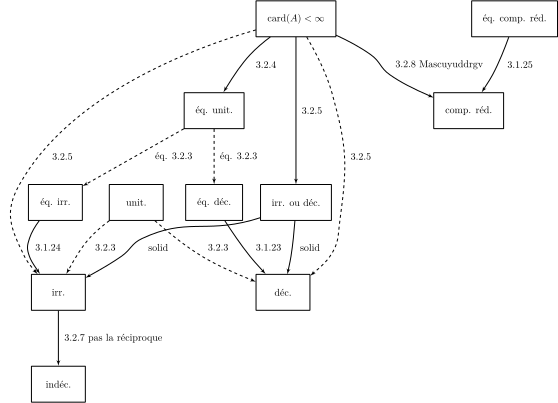

In [19]:

def insert_standalone(tex_file_path):
    with open(tex_file_path, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if line.startswith(r"\documentclass{article}"):
            lines[i] = r"\documentclass[border=0pt]{standalone}" + "\n"
            break
    for i, line in enumerate(lines):
        if line.startswith(r"\enlargethispage{100cm}"):
            lines[i] = r"" + "\n"
            break


    with open(tex_file_path, 'w') as f:
        f.writelines(lines)


def test():
    print(f"ipynb version test")
#csv_to_svg(csv_data)
#csv_to_svg(csv_data,csv_node,"testor")

def csv_to_pd(csv_data,csv_node=""):
    # Create DataFrame A
    A = pd.read_csv(io.StringIO(csv_data), comment='#')
    D = ""
       # Create DataFrame B with distinct elements from first two columns
    B = pd.concat([A['source'], A['target']]).drop_duplicates()
    B = pd.DataFrame({
        'texlbl': B,
        'name': B
    })
    print("here 1",B)
    #If a node CSV is provided, update texlbl in B with node labels
    if csv_node:
        D = pd.read_csv(io.StringIO(csv_node), comment='#')
        print(D)
        print(B)
        # Merge B with D to update texlbl
        B = B.merge(D[['name', 'texlbl','shape']], on='name', how='left')
        #print(B)
        # Update texlbl column, keeping original if no match in D
        B['texlbl'] = B['texlbl_y'].fillna(B['texlbl_x'])

        # Drop the temporary merge columns
        B = B.drop(columns=['texlbl_x', 'texlbl_y'])
        #print(B)
    print("here2",B)
    B = pd.DataFrame({
        'texlbl': B['texlbl'],
        'name': B['name'].apply(to_variable_name),
        'shape':B['shape']})
    # Create DataFrame C
    print("here3",B)
    # Create DataFrame C
    C = pd.DataFrame({
        'source_name': A['source'].apply(to_variable_name),
        'target_name': A['target'].apply(to_variable_name),
        'label': A['label'],
        'style': A.iloc[:, 3]
    })

    C.fillna("solid", inplace=True)
    return (B,C)
def csv_to_svg(csv_data,csv_node="",tex_file_path = "graph"):
    (B,C)=csv_to_pd(csv_data,csv_node)
    G = pd_to_nx(B,C)
    nx_to_dot(G,tex_file_path)


    # Using subprocess for shell commands
    subprocess.run(f'dot2tex --docpreamble "\\usepackage[utf8]{{inputenc}} \\usepackage[T1]{{fontenc}} \\usepackage{{amssymb}}" -tmath --autosize "{tex_file_path}.dot" > "{tex_file_path}.tex"', shell=True)
    insert_standalone(f"{tex_file_path}.tex")
    subprocess.run(f'xelatex "{tex_file_path}.tex"', shell=True)

    subprocess.run(f'pdf2svg "{tex_file_path}.pdf" "{tex_file_path}.svg"', shell=True)
    print(f"ipynb version")
    display(SVG(f"{tex_file_path}.svg"))

'''

(B,C)=csv_to_pd(csv_data,csv_node)
display(B)
G = pd_to_nx(B,C)
nx_to_dot(G,tex_file_path)
display(B)
C
'''
csv_to_svg(csv_data,csv_node,"teststandalone")